In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [86]:
data = pd.read_csv('Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
ds = data.copy()
ds.drop('Loan_ID', axis = 1, inplace = True)

In [88]:
ds.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
ds['Dependents'].sample(200).values
ds['Dependents'] = ds['Dependents'].str.replace('+', '')
ds['Dependents'] = pd.to_numeric(ds['Dependents'], errors = 'coerce')
ds['Dependents'].dtypes

dtype('float64')

In [90]:
cat = ds.select_dtypes(exclude = 'number')
num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Data')
display(cat.head())

Numerical Data


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0




Categorical Data


,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [91]:
for i in ds.columns:
    if ((ds[i].isnull().sum() / len(ds)) * 100) < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
      ds.drop(i, axis = 1, inplace =True)

ds.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [92]:
#to know the columns to scale
cols_to_scale = []
for i in num.columns:
    if ds[i].describe()[2] > 1500:
        cols_to_scale.append(i)


cols_to_scale

['ApplicantIncome', 'CoapplicantIncome']

In [93]:
# SCALE THE NUMERICAL COLUMNS
from sklearn.preprocessing import StandardScaler
import joblib

scaled = {}

for i in cols_to_scale[:]:
    scale = StandardScaler()
    ds[i] = scale.fit_transform(ds[[i]])
    joblib.dump(scale, open(f'{i}_scaler.pkl', 'wb'))
    scaled[i + '_scaler']=scale

scaled

{'ApplicantIncome_scaler': StandardScaler(),
 'CoapplicantIncome_scaler': StandardScaler()}

In [94]:
# to encode categorical datas
from sklearn.preprocessing import LabelEncoder

encoded = {}
for i in cat.columns:
    encode = LabelEncoder()
    ds[i] = encode.fit_transform(ds[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i + 'encoder'] = encode

encoded

{'Genderencoder': LabelEncoder(),
 'Marriedencoder': LabelEncoder(),
 'Educationencoder': LabelEncoder(),
 'Self_Employedencoder': LabelEncoder(),
 'Property_Areaencoder': LabelEncoder(),
 'Loan_Statusencoder': LabelEncoder()}

In [95]:
ds.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,0.072991,-0.554487,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,-0.134412,-0.038732,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,-0.393747,-0.554487,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,-0.462062,0.251980,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,0.097728,-0.554487,141.0,360.0,1.0,2,1


In [96]:
sel_cols = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area',
            'Credit_History', 'Loan_Amount_Term', 'Loan_Status']

new_data = ds[sel_cols]
new_data.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
0,0.072991,128.0,-0.554487,0.0,2,1.0,360.0,1
1,-0.134412,128.0,-0.038732,1.0,0,1.0,360.0,0
2,-0.393747,66.0,-0.554487,0.0,2,1.0,360.0,1
3,-0.462062,120.0,0.251980,0.0,2,1.0,360.0,1
4,0.097728,141.0,-0.554487,0.0,2,1.0,360.0,1


In [97]:
#------ Modelling ---------
from sklearn.model_selection import train_test_split

x = new_data.drop('Loan_Status', axis = 1)
y = new_data.Loan_Status

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, stratify=y)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (491, 7)
Xtest: (123, 7)
Ytrain: (491,)
Ytest: (123,)


In [44]:
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#model.fit(xtrain, ytrain)




LogisticRegression()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
331,-0.404396,98.0,-0.554487,0.0,1,1.0,360.0,1
580,0.186194,205.0,-0.554487,2.0,1,1.0,360.0,1
43,-0.239588,134.0,0.244455,0.0,1,1.0,360.0,1
441,0.409160,180.0,0.072423,0.0,0,1.0,360.0,1
53,-0.129006,134.0,-0.554487,2.0,2,1.0,360.0,0
...,...,...,...,...,...,...,...,...
496,-0.459277,107.0,0.026935,0.0,0,1.0,360.0,1
460,-0.543975,160.0,0.841952,0.0,1,1.0,360.0,1
135,-0.229922,290.0,2.096114,3.0,1,1.0,360.0,0
363,-0.391618,95.0,0.482838,0.0,2,1.0,300.0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

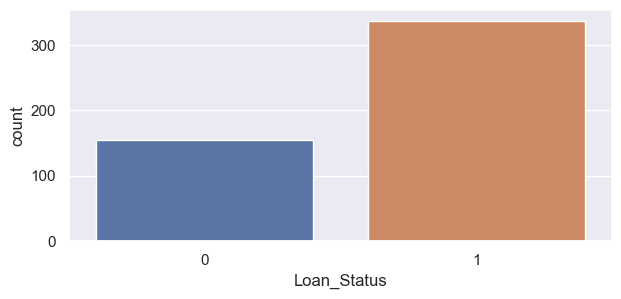

In [98]:
training_data = pd.concat([xtrain, ytrain], axis = 1)
plt.figure(figsize = (7,3))

display(training_data)
sns.countplot(x = training_data['Loan_Status'])

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
53,-0.129006,134.0,-0.554487,2.0,2,1.0,360.0,0
48,-0.451905,120.0,0.622038,0.0,2,0.0,360.0,0
17,-0.310196,76.0,-0.554487,0.0,2,0.0,360.0,0
259,-0.077401,128.0,-0.554487,3.0,1,1.0,360.0,0
34,1.162593,320.0,0.471552,3.0,0,1.0,360.0,0
...,...,...,...,...,...,...,...,...
509,1.287427,40.0,-0.554487,1.0,2,1.0,360.0,1
318,-0.305118,112.0,-0.554487,1.0,1,1.0,360.0,1
430,0.527606,150.0,-0.554487,1.0,1,1.0,360.0,1
454,0.275479,84.0,-0.554487,0.0,1,1.0,360.0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

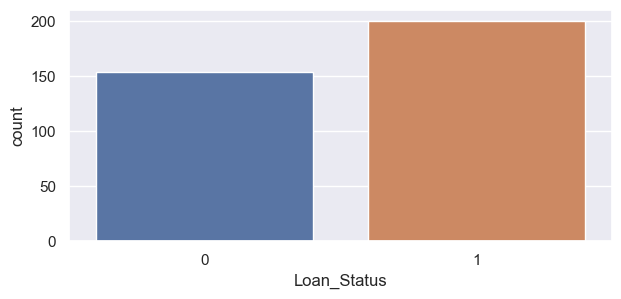

In [99]:
class0 = training_data.loc[training_data['Loan_Status'] == 0]
class1 = training_data.loc[training_data['Loan_Status'] == 1]

new_class1 = class1.sample(200)

new_training_data = pd.concat([class0, new_class1], axis = 0)

display(new_training_data)
plt.figure(figsize = (7,3))
sns.set(style= 'darkgrid')
sns.countplot(x = new_training_data['Loan_Status'])

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
#model.fit(xtrain, ytrain)

RandomForestClassifier()

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [101]:
from sklearn.metrics import classification_report

prediction = model.predict(xtrain)
print(classification_report(prediction, ytrain))

              precision    recall  f1-score   support

           0       0.45      0.93      0.61        74
           1       0.99      0.80      0.88       417

    accuracy                           0.82       491
   macro avg       0.72      0.86      0.74       491
weighted avg       0.90      0.82      0.84       491



In [102]:
from sklearn.metrics import classification_report

prediction = model.predict(xtest)
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       0.34      0.87      0.49        15
           1       0.98      0.77      0.86       108

    accuracy                           0.78       123
   macro avg       0.66      0.82      0.68       123
weighted avg       0.90      0.78      0.82       123



In [104]:
#Model Saving
joblib.dump(model, open('loanpredictionmodel.pkl','wb'))